In [1]:
%matplotlib notebook
import numpy as np
import scipy
from scipy.signal import *
import matplotlib.pyplot as plt

In [20]:
fileName = 'name-f3.180000e+08-s2.500000e+05-t20200114221633.cfile'
# fileName = 'name-f3.150000e+08-s2.500000e+05-t20200114214353.cfile'
samples  = np.fromfile(fileName, np.complex64).tolist()

In [21]:
fld = fileName.split('-')
centerFreq = float(fld[1][1:])
sampleFreq = float(fld[2][1:])

<IPython.core.display.Javascript object>


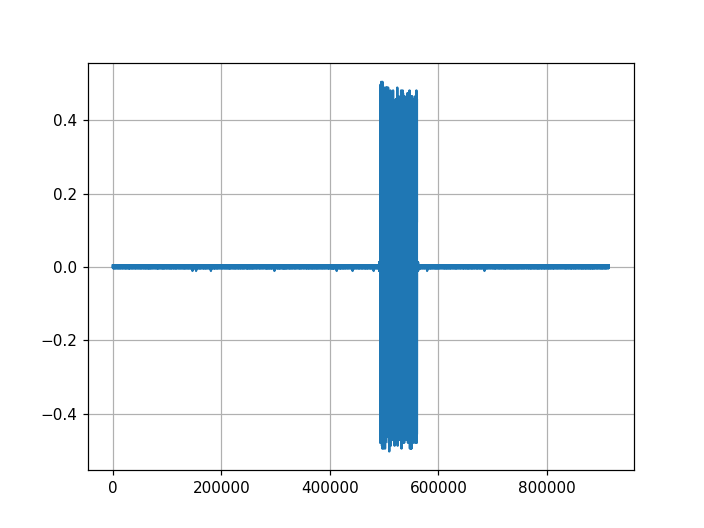

In [22]:
plt.figure()
plt.plot(np.real(samples))
plt.grid()

In [31]:
# s = samples[490000:520000]
s = samples[490000:570000]

<IPython.core.display.Javascript object>


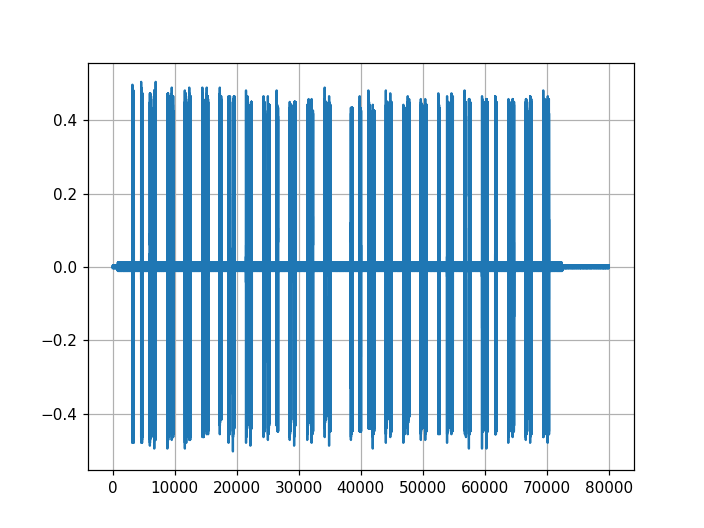

In [32]:
plt.figure()
plt.plot(np.real(s))
plt.grid()

<IPython.core.display.Javascript object>


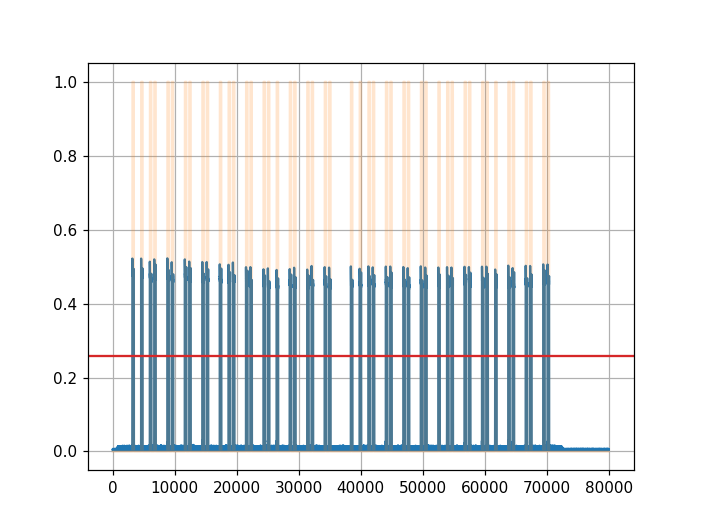

In [33]:
env  = np.abs(s)
mid  = (np.max(env) - np.min(env)) / 2.0
bits = env > mid
plt.figure()
plt.plot(env)
plt.plot(bits, alpha=0.2)
plt.axhline(mid, color='#d62728')
plt.grid()

In [34]:
edges = np.where(np.abs(np.diff(bits)) > 0.5)[0]
edIdx = np.diff(edges)

<IPython.core.display.Javascript object>


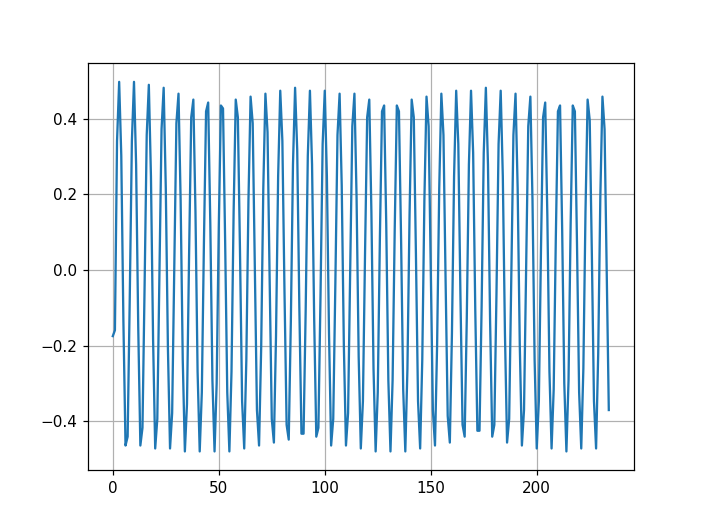

In [35]:
burst = np.real( s[edges[0]:edges[1]] )
plt.figure()
plt.plot(burst)
plt.grid()
samplesPerBurst = edges[1] - edges[0]

<IPython.core.display.Javascript object>


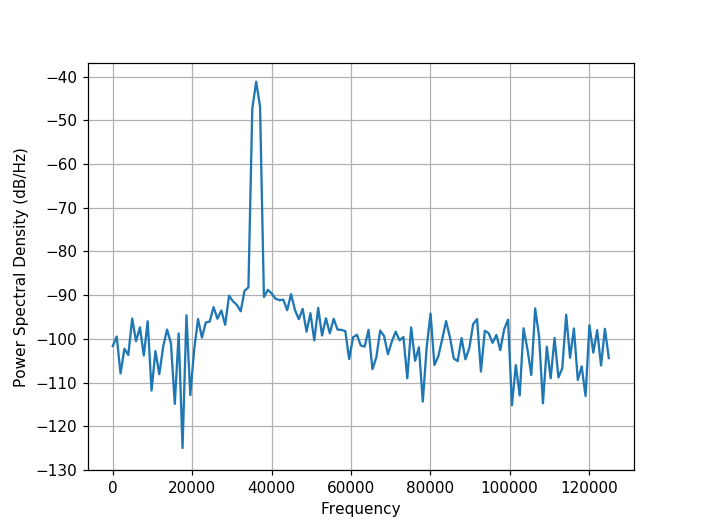

In [36]:
plt.figure()
plt.psd(burst, 256, sampleFreq)
plt.grid(True)

<IPython.core.display.Javascript object>


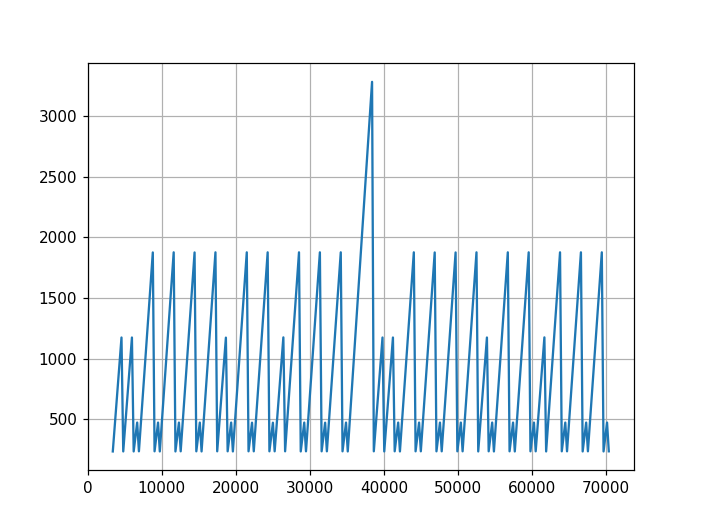

In [37]:
plt.figure()
plt.plot(edges[1:],edIdx)
plt.grid()

bitsPerSymbol = np.min(edIdx)

<IPython.core.display.Javascript object>


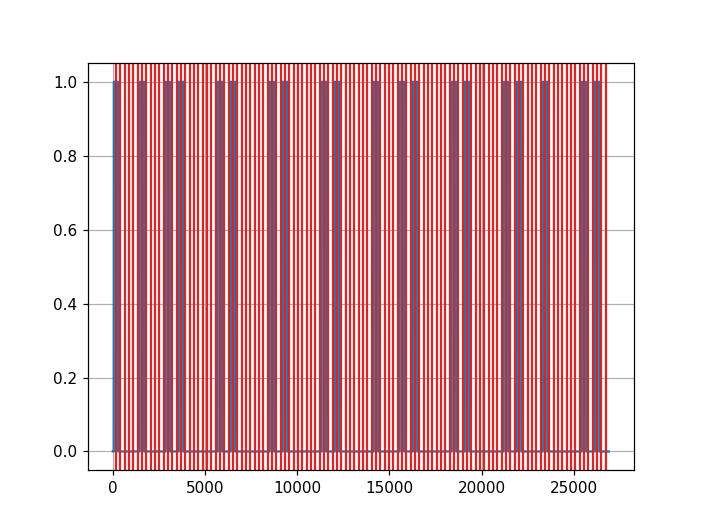

In [30]:
sBits = bits[ edges[0] - 50 : ]
symbolCenter = np.arange(50 + bitsPerSymbol // 2,len(sBits),bitsPerSymbol)
plt.figure()
plt.plot(sBits)
for c in symbolCenter:
    plt.axvline(c, color='#d62728')
plt.grid()